In [1]:
import xarray as xr
import numpy as np
import cftime
import nc_time_axis
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import ticker, cm
from cftime import datetime 
import matplotlib.colors as colors
import math
import random
import matplotlib.cm as mcm
jet = mcm.get_cmap('jet')
import cartopy.crs as ccrs # CRS stands for "Coordinate reference systems" for map projection
from cartopy.crs import PlateCarree
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from dateutil import tz
import pytz
%matplotlib inline 

filename="Nc_Files/Jianfei_WACCMX_files/waccmx_Fe_Fep_Feb.nc"
#filename="Nc_Files/Jianfei_WACCMX_files/waccmx_Na_Nap_Feb.nc"
#filename="Nc_Files/Jianfei_WACCMX_files/waccmx_Mg_Mgp_Feb.nc"

filename2="Nc_Files/Jianfei_WACCMX_files/waccmx_T_Z3_e_Feb.nc"
#filename3="Nc_Files/Jianfei_WACCMX_files/waccmx_winds_Feb.nc"

M = filename[-10:]
Metal=M[0:2]
#print(Metal)

ds = xr.open_dataset(filename)
ds2 = xr.open_dataset(filename2)
#ds2
#ds

In [2]:
time = ds.variables['time']
times = xr.cftime_range(start="0001-02-01", periods=672, freq="1H", calendar="noleap")
times2 = ds["time"].dt.strftime("%Y%m%d %H:%M")
times3 = ds["time"].dt.strftime("%Y%m%d")

#times
#times2
#times3

In [3]:
lon = ds.variables['lon']
lat = ds.variables['lat']
lev = ds.variables['lev']

#M = ds.variables[str(Metal)]
#Mp = ds.variables[str(Metal)+'p']

dst = ds.transpose("lev", ...)
Mt = dst.variables[str(Metal)]
Mpt = dst.variables[str(Metal)+'p']

In [4]:
ds2t = ds2.transpose("lev", ...)
temp = ds2t.variables['T']
elect = ds2t.variables['e']

geopH = ds2t.variables['Z3'] / 1000 #m-> km
Zavg = geopH.mean(('time','lat', 'lon'))

#Mtdens = ( Mt * 1e-6 * 100 * lev ) / (1.380503e-23 * temp)
#Mptdens = ( Mpt * 1e-6 * 100 * lev ) / (1.380503e-23 * temp)


In [5]:
lev_sl_idx_min = 42
lev_sl_idx_max = 66
lev_sl = lev[lev_sl_idx_min:lev_sl_idx_max+1]

lev_sl_ind_min = lev[lev_sl_idx_min] 
lev_sl_ind_max = lev[lev_sl_idx_max] 
lev_sl_str = str("%.1e" % lev_sl_ind_min) + ' hPa : ' + str("%.1e" % lev_sl_ind_max) + ' hPa'
print('Reduced lev = ' + lev_sl_str)


Zavg_sl = Zavg[lev_sl_idx_min:lev_sl_idx_max+1]

Zavg_sl_min = Zavg[lev_sl_idx_min] 
Zavg_sl_max = Zavg[lev_sl_idx_max]
Zavg_sl_str = str("%.0f" % Zavg_sl_min) + ' km : ' + str("%.0f" % Zavg_sl_max) + ' km'
print('Approx Z = ' + Zavg_sl_str)

geopH_sl = geopH[lev_sl_idx_min:lev_sl_idx_max+1,:,:,:]

Reduced lev = 4.9e-09 hPa : 3.3e-06 hPa
Approx Z = 449 km : 163 km


In [6]:
#lev_sl #lev: 25

In [7]:
#print(elect) #lev: 126, time: 672, lat: 96, lon: 144

electr = elect[lev_sl_idx_min:lev_sl_idx_max+1,:,:,:]
tempe = temp[lev_sl_idx_min:lev_sl_idx_max+1,:,:,:]

#electr #lev: 25 time: 672 lat: 96 lon: 144
#tempe #lev: 25 time: 672 lat: 96 lon: 144

In [ ]:
edens = ( electr * 1e-6 * 100 * lev_sl ) / (1.380503e-23 * tempe)
#edens
#edens_sl = edens.where(edens > 1e5)

In [ ]:
edens_max_levtime = edens.max({'lev', 'time'}, keep_attrs=True)
#edens_max_levtime #lat: 96 lon: 144

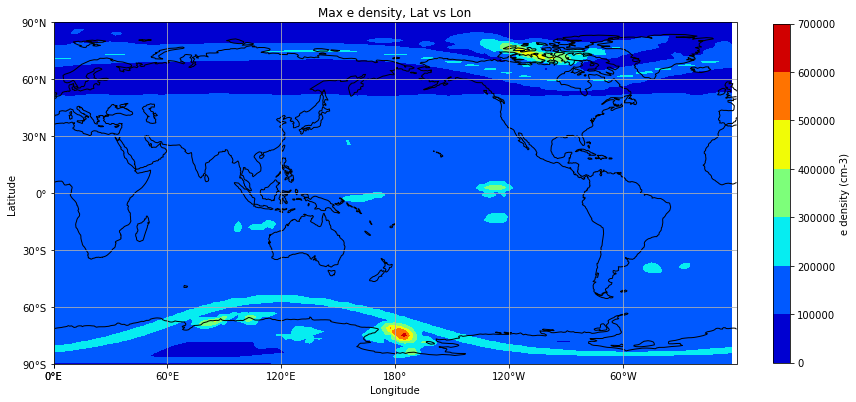

In [ ]:
#------------------------Plot 1-----------------------------

#ticks = np.geomspace(1*10**3, 2*10**4)
ticks = np.linspace(0,20,21)

fig = plt.figure(figsize=(12,8))

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.set_global()

C = plt.contourf(lon, lat, edens_max_levtime, 
                 #levels=ticks,
                 transform=ccrs.PlateCarree(),
                 #locator=ticker.LogLocator(),
                 #extend='both',
                 cmap=jet)

ax.coastlines() 
ax.gridlines()

ax.set_xlabel('Longitude')

#ax.set_xticks([0, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180], crs=ccrs.PlateCarree())
ax.set_xticks([0, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
ax.yaxis.set_major_formatter(LatitudeFormatter())  
ax.set_ylabel('Latitude')
ax.set_title('Max e density, Lat vs Lon')

#------------------
#def fmt(x, pos):
#    a, b = '{:.1e}'.format(x).split('e')
#    b = int(b)
#    return r'${} \times 10^{{{}}}$'.format(a, b)

cbar = fig.colorbar(C, fraction=0.023, pad=0.05)#,ticks=ticks[::2]) #,format=ticker.FuncFormatter(fmt)
#-------------------
#cbar = fig.colorbar(C)#,format='%.0e', fraction=0.023, pad=0.05)  #

cbar.set_label(r'e density (cm-3)')

#figname='foEs: Lat vs Lon '+ time_plot_str2 + '.png'
#plt.savefig('./Figures/Jianfei_run/'+str(figname), dpi = 300) #
plt.tight_layout()
plt.show()

In [ ]:
edens_max = edens.max({'lev', 'time', 'lat', 'lon'}, keep_attrs=True)
edens_max 

<xarray.Variable ()>
array(650153.31195306)

In [ ]:
edens_max_inds = edens.argmax(('lev', 'time', 'lat', 'lon'), keep_attrs=True)
print(edens_max_inds)

#{'lev': <xarray.Variable ()> array(13),
#'time': <xarray.Variable ()> array(299),
#'lat': <xarray.Variable ()> array(8),
#'lon': <xarray.Variable ()> array(74)}

{'lev': <xarray.Variable ()>
array(13), 'time': <xarray.Variable ()>
array(299), 'lat': <xarray.Variable ()>
array(8), 'lon': <xarray.Variable ()>
array(74)}


In [ ]:
lev_max = lev_sl[13] 
time_max = time[299] 
lat_max = lat[8] 
lon_max = lon[74] 
geopH_lev_max = geopH_sl[13,299,8,74] 

#print(str(lev_max)) #0.0003798 = 3.7e-3
#print(str(time_max)) #1, 2, 13, 11, 0, 0, 0 11th Feb 00:00
#print(str(lat_max)) #-74.84210526
#print(str(lon_max)) #185.
#print(str(geopH_lev_max)) #95.74164 km

#edens[13,299,8,74] #650153.31195306)


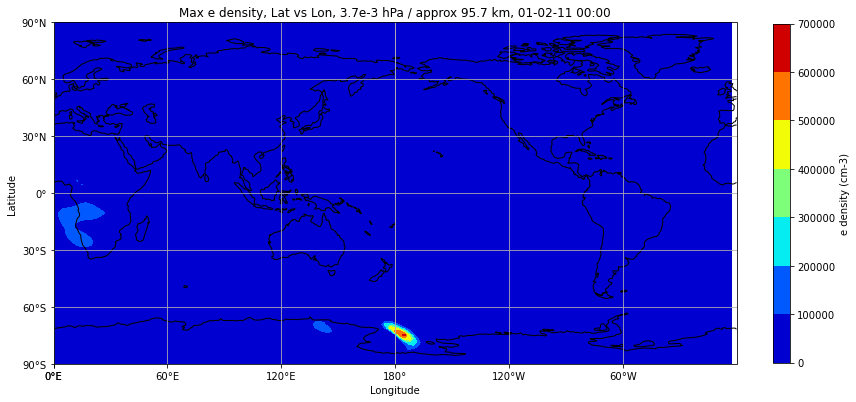

In [ ]:
#------------------------Plot 1-----------------------------

#ticks = np.geomspace(1*10**3, 2*10**4)
ticks = np.linspace(0,20,21)

fig = plt.figure(figsize=(12,8))

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.set_global()

C = plt.contourf(lon, lat, edens[13,299,:,:], 
                 #levels=ticks,
                 transform=ccrs.PlateCarree(),
                 #locator=ticker.LogLocator(),
                 #extend='both',
                 cmap=jet)

ax.coastlines() 
ax.gridlines()

ax.set_xlabel('Longitude')

#ax.set_xticks([0, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180], crs=ccrs.PlateCarree())
ax.set_xticks([0, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
ax.yaxis.set_major_formatter(LatitudeFormatter())  
ax.set_ylabel('Latitude')
ax.set_title('Max e density, Lat vs Lon, 3.7e-3 hPa / approx 95.7 km, 01-02-11 00:00')

#------------------
#def fmt(x, pos):
#    a, b = '{:.1e}'.format(x).split('e')
#    b = int(b)
#    return r'${} \times 10^{{{}}}$'.format(a, b)

cbar = fig.colorbar(C, fraction=0.023, pad=0.05)#,ticks=ticks[::2]) #,format=ticker.FuncFormatter(fmt)
#-------------------
#cbar = fig.colorbar(C)#,format='%.0e', fraction=0.023, pad=0.05)  #

cbar.set_label(r'e density (cm-3)')

#figname='foEs: Lat vs Lon '+ time_plot_str2 + '.png'
#plt.savefig('./Figures/Jianfei_run/'+str(figname), dpi = 300) #
plt.tight_layout()
plt.show()

In [ ]:
edens_max = edens[13,299,8,74]
Nem = edens_max * 1e6 #cm-3 -> m-3
foEs = 8.98 * np.sqrt(Nem) #Hz
foEs = foEs / 1e6 #MHz
foEs #7.24 MHz

<xarray.Variable ()>
array(7.24076123)